In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
fifa = pd.read_csv('fifa21_train.csv')
display(fifa.head())
fifa.shape


ID           Name  Age  Nationality                        Club   BP  \
0  184383      A. Pasche   26  Switzerland           FC Lausanne-Sport   CM   
1  188044  Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   ST   
2  184431    S. Giovinco   33        Italy                    Al Hilal  CAM   
3  233796       J. Evans   22        Wales                Swansea City  CDM   
4  234799     Y. Demoncy   23       France  US Orléans Loiret Football  CDM   

   Position                               Team & Contract Height  Weight  \
0    CM CDM                 FC Lausanne-Sport 2015 ~ 2020   5'9"  161lbs   
1  ST LW LM  Beijing Sinobo Guoan FC Dec 31, 2020 On Loan   6'0"  159lbs   
2    CAM CF                          Al Hilal 2019 ~ 2022   5'4"  134lbs   
3    CDM CM                      Swansea City 2016 ~ 2021  5'10"  152lbs   
4    CDM CM        US Orléans Loiret Football 2018 ~ 2021  5'11"  150lbs   

    foot  Growth        Joined Loan Date End  Value  Wage Release Clause  \
0  Right       1   Jul 1, 2015           NaN  €525K   €4K          €801K   
1  Right       0  Jan 16, 2015  Dec 31, 2020  €8.5M  €23K             €0   
2  Right       0  Jan 31, 2019           NaN    €9M  €49K         €15.3M   
3  Right      13   Jul 1, 2016           NaN  €275K   €4K          €694K   
4  Right       8   Jul 1, 2018           NaN  €725K   €2K          €1.4M   

               Contract  Attacking  Crossing  Finishing  Heading Accuracy  \
0           2015 ~ 2020        258        54         47                43   
1  Dec 31, 2020 On Loan        365        66         79                76   
2           2019 ~ 2022        336        73         76                34   
3           2016 ~ 2021        242        44         42                58   
4           2018 ~ 2021        249        49         37                61   

   Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0             70     44.0    286         61   44.0           55            63   
1             68     76.0    375         83   78.0           72            63   
2             78     75.0    424         85   89.0           91            74   
3             62     36.0    259         54   41.0           46            57   
4             68     34.0    280         64   44.0           45            61   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0            63       346            64            73     61.0         66   
1            79       404            83            83     88.0         75   
2            85       424            84            76     93.0         78   
3            61       282            54            59     59.0         55   
4            66       324            66            66     61.0         62   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0     82.0    306          62     73.0       71        55          45   
1     75.0    372          74     81.0       75        74          68   
2     93.0    308          79     34.0       75        42          78   
3     55.0    277          57     60.0       64        58          38   
4     69.0    280          61     34.0       81        61          43   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        290          54           52.0         62.0    68.0         54   
1        313          54           33.0         78.0    72.0         76   
2        332          75           26.0         80.0    78.0         73   
3        257          61           57.0         31.0    54.0         54   
4        294          66           60.0         55.0    64.0         49   

   Composure  Defending  Marking  Standing Tackle  Sliding Tackle  \
0       54.0        148       49               56            43.0   
1       70.0         77       35               20            22.0   
2       82.0         80       23               29            28.0   
3       48.0        168       55       

(11701, 101)

In [4]:
fifa.duplicated().sum() 

0

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fifa.dtypes)

ID                    int64
Name                 object
Age                   int64
Nationality          object
Club                 object
BP                   object
Position             object
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control          int64
Movement              int64
Acceleration          int64
Sprint Speed          int64
Agility             float64
Reactions             int64
Balance             

In [6]:
fifa1 = fifa.drop(columns=['Wage', 'Growth', 'Value', 'ID', 'Name', 'Nationality', 'Club', 'Team & Contract', "Joined", "Loan Date End", "Release Clause", "Contract", "A/W", "D/W"], axis=1)

In [7]:
cols1 = []
for column in fifa1.columns:
    cols1.append(column.lower())
cols1
fifa1.columns = cols1

fifa1.head()

fifa1

age   bp   position height  weight   foot  attacking  crossing  \
0       26   CM     CM CDM   5'9"  161lbs  Right        258        54   
1       30   ST   ST LW LM   6'0"  159lbs  Right        365        66   
2       33  CAM     CAM CF   5'4"  134lbs  Right        336        73   
3       22  CDM     CDM CM  5'10"  152lbs  Right        242        44   
4       23  CDM     CDM CM  5'11"  150lbs  Right        249        49   
...    ...  ...        ...    ...     ...    ...        ...       ...   
11696   25   LB         LB   6'1"  168lbs   Left        224        62   
11697   27   GK         GK   6'1"  174lbs  Right         84        12   
11698   22   RM  LM CAM RM   5'6"  143lbs  Right        286        64   
11699   26   CM        NaN   6'2"  179lbs  Right        254        64   
11700   22  CAM  ST CAM LM   5'7"  143lbs   Left        289        43   

       finishing  heading accuracy  short passing  volleys  skill  dribbling  \
0             47                43             70     44.0    286         61   
1             79                76             68     76.0    375         83   
2             76                34             78     75.0    424         85   
3             42                58             62     36.0    259         54   
4             37                61             68     34.0    280         64   
...          ...               ...            ...      ...    ...        ...   
11696         24                51             59     28.0    248         57   
11697         14                13             29     16.0     96         17   
11698         66                51             64     41.0    291         71   
11699         66                51             73      NaN    284         74   
11700         64                65             64     53.0    267         64   

       curve  fk accuracy  long passing  ball control  movement  acceleration  \
0       44.0           55            63            63       346            64   
1       78.0           72            63            79       404            83   
2       89.0           91            74            85       424            84   
3       41.0           46            57            61       282            54   
4       44.0           45            61            66       324            66   
...      ...          ...           ...           ...       ...           ...   
11696   49.0           29            54            59       333            78   
11697   15.0           19            27            18       237            40   
11698   57.0           38            58            67       388            77   
11699    NaN           63            72            75       198            71   
11700   41.0           43            55            64       391            81   

       sprint speed  agility  reactions  balance  power  shot power  jumping  \
0                73     61.0         66     82.0    306          62     73.0   
1                83     88.0         75     75.0    372          74     81.0   
2                76     93.0         78     93.0    308          79     34.0   
3                59     59.0         55     55.0    277          57     60.0   
4                66     61.0         62     69.0    280          61     34.0   
...             ...      ...        ...      ...    ...         ...      ...   
11696            73     68.0         53     61.0    273          31     72.0   
11697            40     38.0         65     54.0    217          50     59.0   
11698            76     86.0         62     87.0    278          61     71.0   
11699            72      NaN         55      NaN    258          61      NaN   
11700            78     87.0         61     84.0    312          62     85.0   

       stamina  strength  long shots  mentality  aggression  interceptions  \
0           71        55          45        290          54           52.0   
1           75        74          68        313          54           33.0   
2

In [8]:
fifa1['hits'] = fifa1['hits'].apply(pd.to_numeric, errors='coerce')

In [9]:
fifa1.select_dtypes(include=object)

bp   position height  weight   foot  w/f  sm   ir    ls    st    rs  \
0       CM     CM CDM   5'9"  161lbs  Right  4 ★  2★  1 ★  58+1  58+1  58+1   
1       ST   ST LW LM   6'0"  159lbs  Right  3 ★  4★  2 ★  77+0  77+0  77+0   
2      CAM     CAM CF   5'4"  134lbs  Right  4 ★  4★  2 ★  73+2  73+2  73+2   
3      CDM     CDM CM  5'10"  152lbs  Right  2 ★  2★  1 ★  50+2  50+2  50+2   
4      CDM     CDM CM  5'11"  150lbs  Right  2 ★  3★  1 ★  56+2  56+2  56+2   
...    ...        ...    ...     ...    ...  ...  ..  ...   ...   ...   ...   
11696   LB         LB   6'1"  168lbs   Left  3 ★  2★  1 ★  48+2  48+2  48+2   
11697   GK         GK   6'1"  174lbs  Right  2 ★  1★  1 ★  28+2  28+2  28+2   
11698   RM  LM CAM RM   5'6"  143lbs  Right  3 ★  3★  1 ★  62+2  62+2  62+2   
11699   CM        NaN   6'2"  179lbs  Right  3 ★  1★  3 ★  68+0  68+0  68+0   
11700  CAM  ST CAM LM   5'7"  143lbs   Left  3 ★  3★  1 ★  64+2  64+2  64+2   

         lw    lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm  \
0      61+0  62+0  62+0  62+0  61+0  63+1  63+1  63+1  63+1  63+1  63+1  63+1   
1      77+0  77+0  77+0  77+0  77+0  76+1  76+1  76+1  76+1  68+2  68+2  68+2   
2      80+0  79+0  79+0  79+0  80+0  80+0  80+0  80+0  79+1  74+2  74+2  74+2   
3      51+0  51+0  51+0  51+0  51+0  53+2  53+2  53+2  53+2  56+2  56+2  56+2   
4      59+0  59+0  59+0  59+0  59+0  61+2  61+2  61+2  62+2  63+2  63+2  63+2   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
11696  55+0  52+0  52+0  52+0  55+0  54+2  54+2  54+2  58+2  56+2  56+2  56+2   
11697  24+0  26+0  26+0  26+0  24+0  24+2  24+2  24+2  25+2  25+2  25+2  25+2   
11698  67+0  65+0  65+0  65+0  67+0  65+2  65+2  65+2  66+2  58+2  58+2  58+2   
11699  71+0  68+0  68+0  68+0  71+0  72+0  72+0  72+0  71+0  71+0  71+0  71+0   
11700  65+0  65+0  65+0  65+0  65+0  65+2  65+2  65+2  63+2  58+2  58+2  58+2   

         rm   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
0      63+1  59+1  59+1  59+1  59+1  59+1  58+1  54+1  54+1  54+1  58+1  15+1  
1      76+1  57+2  53+2  53+2  53+2  57+2  53+2  48+2  48+2  48+2  53+2  18+2  
2      79+1  59+2  56+2  56+2  56+2  59+2  53+2  41+2  41+2  41+2  53+2  12+2  
3      53+2  56+2  58+2  58+2  58+2  56+2  57+2  58+2  58+2  58+2  57+2  14+2  
4      62+2  64+2  64+2  64+2  64+2  64+2  63+2  61+2  61+2  61+2  63+2  15+2  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
11696  58+2  63+2  60+2  60+2  60+2  63+2  63+2  61+2  61+2  61+2  63+2  16+2  
11697  25+2  25+2  26+2  26+2  26+2  25+2  24+2  26+2  26+2  26+2  24+2  69+2  
11698  66+2  49+2  44+2  44+2  44+2  49+2  45+2  35+2  35+2  35+2  45+2  17+2  
11699  71+0  66+0  68+0  68+0  68+0  66+0  64+0  60+0  60+0  60+0  64+0  25+0  
11700  63+2  46+2  43+2  43+2  43+2  46+2  44+2  36+2  36+2  36+2  44+2  15+2  

[11701 rows x 35 columns]

In [10]:
fifa1['w/f'] = fifa1['w/f'].str.rstrip("★").astype(float)
fifa1['sm'] = fifa1['sm'].str.rstrip("★").astype(float)
fifa1['ir'] = fifa1['ir'].str.rstrip("★").astype(float)
fifa1

age   bp   position height  weight   foot  attacking  crossing  \
0       26   CM     CM CDM   5'9"  161lbs  Right        258        54   
1       30   ST   ST LW LM   6'0"  159lbs  Right        365        66   
2       33  CAM     CAM CF   5'4"  134lbs  Right        336        73   
3       22  CDM     CDM CM  5'10"  152lbs  Right        242        44   
4       23  CDM     CDM CM  5'11"  150lbs  Right        249        49   
...    ...  ...        ...    ...     ...    ...        ...       ...   
11696   25   LB         LB   6'1"  168lbs   Left        224        62   
11697   27   GK         GK   6'1"  174lbs  Right         84        12   
11698   22   RM  LM CAM RM   5'6"  143lbs  Right        286        64   
11699   26   CM        NaN   6'2"  179lbs  Right        254        64   
11700   22  CAM  ST CAM LM   5'7"  143lbs   Left        289        43   

       finishing  heading accuracy  short passing  volleys  skill  dribbling  \
0             47                43             70     44.0    286         61   
1             79                76             68     76.0    375         83   
2             76                34             78     75.0    424         85   
3             42                58             62     36.0    259         54   
4             37                61             68     34.0    280         64   
...          ...               ...            ...      ...    ...        ...   
11696         24                51             59     28.0    248         57   
11697         14                13             29     16.0     96         17   
11698         66                51             64     41.0    291         71   
11699         66                51             73      NaN    284         74   
11700         64                65             64     53.0    267         64   

       curve  fk accuracy  long passing  ball control  movement  acceleration  \
0       44.0           55            63            63       346            64   
1       78.0           72            63            79       404            83   
2       89.0           91            74            85       424            84   
3       41.0           46            57            61       282            54   
4       44.0           45            61            66       324            66   
...      ...          ...           ...           ...       ...           ...   
11696   49.0           29            54            59       333            78   
11697   15.0           19            27            18       237            40   
11698   57.0           38            58            67       388            77   
11699    NaN           63            72            75       198            71   
11700   41.0           43            55            64       391            81   

       sprint speed  agility  reactions  balance  power  shot power  jumping  \
0                73     61.0         66     82.0    306          62     73.0   
1                83     88.0         75     75.0    372          74     81.0   
2                76     93.0         78     93.0    308          79     34.0   
3                59     59.0         55     55.0    277          57     60.0   
4                66     61.0         62     69.0    280          61     34.0   
...             ...      ...        ...      ...    ...         ...      ...   
11696            73     68.0         53     61.0    273          31     72.0   
11697            40     38.0         65     54.0    217          50     59.0   
11698            76     86.0         62     87.0    278          61     71.0   
11699            72      NaN         55      NaN    258          61      NaN   
11700            78     87.0         61     84.0    312          62     85.0   

       stamina  strength  long shots  mentality  aggression  interceptions  \
0           71        55          45        290          54           52.0   
1           75        74          68        313          54           33.0   
2

In [11]:
cols = ['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
for col in cols:
    fifa1[col] = fifa1[col].apply(lambda x:x.split("+")[0])

In [12]:
fifa1[cols] = fifa1[cols].apply(pd.to_numeric, errors='coerce')

In [13]:
fifa1

age   bp   position height  weight   foot  attacking  crossing  \
0       26   CM     CM CDM   5'9"  161lbs  Right        258        54   
1       30   ST   ST LW LM   6'0"  159lbs  Right        365        66   
2       33  CAM     CAM CF   5'4"  134lbs  Right        336        73   
3       22  CDM     CDM CM  5'10"  152lbs  Right        242        44   
4       23  CDM     CDM CM  5'11"  150lbs  Right        249        49   
...    ...  ...        ...    ...     ...    ...        ...       ...   
11696   25   LB         LB   6'1"  168lbs   Left        224        62   
11697   27   GK         GK   6'1"  174lbs  Right         84        12   
11698   22   RM  LM CAM RM   5'6"  143lbs  Right        286        64   
11699   26   CM        NaN   6'2"  179lbs  Right        254        64   
11700   22  CAM  ST CAM LM   5'7"  143lbs   Left        289        43   

       finishing  heading accuracy  short passing  volleys  skill  dribbling  \
0             47                43             70     44.0    286         61   
1             79                76             68     76.0    375         83   
2             76                34             78     75.0    424         85   
3             42                58             62     36.0    259         54   
4             37                61             68     34.0    280         64   
...          ...               ...            ...      ...    ...        ...   
11696         24                51             59     28.0    248         57   
11697         14                13             29     16.0     96         17   
11698         66                51             64     41.0    291         71   
11699         66                51             73      NaN    284         74   
11700         64                65             64     53.0    267         64   

       curve  fk accuracy  long passing  ball control  movement  acceleration  \
0       44.0           55            63            63       346            64   
1       78.0           72            63            79       404            83   
2       89.0           91            74            85       424            84   
3       41.0           46            57            61       282            54   
4       44.0           45            61            66       324            66   
...      ...          ...           ...           ...       ...           ...   
11696   49.0           29            54            59       333            78   
11697   15.0           19            27            18       237            40   
11698   57.0           38            58            67       388            77   
11699    NaN           63            72            75       198            71   
11700   41.0           43            55            64       391            81   

       sprint speed  agility  reactions  balance  power  shot power  jumping  \
0                73     61.0         66     82.0    306          62     73.0   
1                83     88.0         75     75.0    372          74     81.0   
2                76     93.0         78     93.0    308          79     34.0   
3                59     59.0         55     55.0    277          57     60.0   
4                66     61.0         62     69.0    280          61     34.0   
...             ...      ...        ...      ...    ...         ...      ...   
11696            73     68.0         53     61.0    273          31     72.0   
11697            40     38.0         65     54.0    217          50     59.0   
11698            76     86.0         62     87.0    278          61     71.0   
11699            72      NaN         55      NaN    258          61      NaN   
11700            78     87.0         61     84.0    312          62     85.0   

       stamina  strength  long shots  mentality  aggression  interceptions  \
0           71        55          45        290          54           52.0   
1           75        74          68        313          54           33.0   
2

In [14]:
fifa1['height'] = (fifa1['height'].str.extract(r'(\d+)\'\s*(\d+)"').astype(float).mul([12*2.54, 2.54]).sum(axis=1))

In [15]:
fifa1['weight'] = fifa1['weight'].str.rstrip("lbs").astype(float)/2.2


In [16]:
fifa1

age   bp   position  height     weight   foot  attacking  crossing  \
0       26   CM     CM CDM  175.26  73.181818  Right        258        54   
1       30   ST   ST LW LM  182.88  72.272727  Right        365        66   
2       33  CAM     CAM CF  162.56  60.909091  Right        336        73   
3       22  CDM     CDM CM  177.80  69.090909  Right        242        44   
4       23  CDM     CDM CM  180.34  68.181818  Right        249        49   
...    ...  ...        ...     ...        ...    ...        ...       ...   
11696   25   LB         LB  185.42  76.363636   Left        224        62   
11697   27   GK         GK  185.42  79.090909  Right         84        12   
11698   22   RM  LM CAM RM  167.64  65.000000  Right        286        64   
11699   26   CM        NaN  187.96  81.363636  Right        254        64   
11700   22  CAM  ST CAM LM  170.18  65.000000   Left        289        43   

       finishing  heading accuracy  short passing  volleys  skill  dribbling  \
0             47                43             70     44.0    286         61   
1             79                76             68     76.0    375         83   
2             76                34             78     75.0    424         85   
3             42                58             62     36.0    259         54   
4             37                61             68     34.0    280         64   
...          ...               ...            ...      ...    ...        ...   
11696         24                51             59     28.0    248         57   
11697         14                13             29     16.0     96         17   
11698         66                51             64     41.0    291         71   
11699         66                51             73      NaN    284         74   
11700         64                65             64     53.0    267         64   

       curve  fk accuracy  long passing  ball control  movement  acceleration  \
0       44.0           55            63            63       346            64   
1       78.0           72            63            79       404            83   
2       89.0           91            74            85       424            84   
3       41.0           46            57            61       282            54   
4       44.0           45            61            66       324            66   
...      ...          ...           ...           ...       ...           ...   
11696   49.0           29            54            59       333            78   
11697   15.0           19            27            18       237            40   
11698   57.0           38            58            67       388            77   
11699    NaN           63            72            75       198            71   
11700   41.0           43            55            64       391            81   

       sprint speed  agility  reactions  balance  power  shot power  jumping  \
0                73     61.0         66     82.0    306          62     73.0   
1                83     88.0         75     75.0    372          74     81.0   
2                76     93.0         78     93.0    308          79     34.0   
3                59     59.0         55     55.0    277          57     60.0   
4                66     61.0         62     69.0    280          61     34.0   
...             ...      ...        ...      ...    ...         ...      ...   
11696            73     68.0         53     61.0    273          31     72.0   
11697            40     38.0         65     54.0    217          50     59.0   
11698            76     86.0         62     87.0    278          61     71.0   
11699            72      NaN         55      NaN    258          61      NaN   
11700            78     87.0         61     84.0    312          62     85.0   

       stamina  strength  long shots  mentality  aggression  interceptions  \
0           71        55          45        290          54           52.0   
1           75        74       

In [17]:
nulls_df = pd.DataFrame(round(fifa1.isna().sum()/len(fifa1),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

header_name  percent_nulls
0          age           0.00
1           bp           0.00
2     position           2.46
3       height           0.00
4       weight           0.00
..         ...            ...
82          cb           0.00
83         rcb           0.00
84          rb           0.00
85          gk           0.00
86         ova           0.00

[87 rows x 2 columns]

In [18]:
fifa1.select_dtypes(include=np.number)

age  height     weight  attacking  crossing  finishing  \
0       26  175.26  73.181818        258        54         47   
1       30  182.88  72.272727        365        66         79   
2       33  162.56  60.909091        336        73         76   
3       22  177.80  69.090909        242        44         42   
4       23  180.34  68.181818        249        49         37   
...    ...     ...        ...        ...       ...        ...   
11696   25  185.42  76.363636        224        62         24   
11697   27  185.42  79.090909         84        12         14   
11698   22  167.64  65.000000        286        64         66   
11699   26  187.96  81.363636        254        64         66   
11700   22  170.18  65.000000        289        43         64   

       heading accuracy  short passing  volleys  skill  dribbling  curve  \
0                    43             70     44.0    286         61   44.0   
1                    76             68     76.0    375         83   78.0   
2                    34             78     75.0    424         85   89.0   
3                    58             62     36.0    259         54   41.0   
4                    61             68     34.0    280         64   44.0   
...                 ...            ...      ...    ...        ...    ...   
11696                51             59     28.0    248         57   49.0   
11697                13             29     16.0     96         17   15.0   
11698                51             64     41.0    291         71   57.0   
11699                51             73      NaN    284         74    NaN   
11700                65             64     53.0    267         64   41.0   

       fk accuracy  long passing  ball control  movement  acceleration  \
0               55            63            63       346            64   
1               72            63            79       404            83   
2               91            74            85       424            84   
3               46            57            61       282            54   
4               45            61            66       324            66   
...            ...           ...           ...       ...           ...   
11696           29            54            59       333            78   
11697           19            27            18       237            40   
11698           38            58            67       388            77   
11699           63            72            75       198            71   
11700           43            55            64       391            81   

       sprint speed  agility  reactions  balance  power  shot power  jumping  \
0                73     61.0         66     82.0    306          62     73.0   
1                83     88.0         75     75.0    372          74     81.0   
2                76     93.0         78     93.0    308          79     34.0   
3                59     59.0         55     55.0    277          57     60.0   
4                66     61.0         62     69.0    280          61     34.0   
...             ...      ...        ...      ...    ...         ...      ...   
11696            73     68.0         53     61.0    273          31     72.0   
11697            40     38.0         65     54.0    217          50     59.0   
11698            76     86.0         62     87.0    278          61     71.0   
11699            72      NaN         55      NaN    258          61      NaN   
11700            78     87.0         61     84.0    312          62     85.0   

       stamina  strength  long shots  mentality  aggression  interceptions  \
0           71        55          45        290          54           52.0   
1           75        74          68        313          54           33.0   
2           75        42          78        332          75           26.0   
3           64        58          38        257          61           57.0   
4           81        61          43        294          66           60.

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fifa.dtypes)
    

ID                    int64
Name                 object
Age                   int64
Nationality          object
Club                 object
BP                   object
Position             object
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control          int64
Movement              int64
Acceleration          int64
Sprint Speed          int64
Agility             float64
Reactions             int64
Balance             

In [20]:
fifa1.select_dtypes(include=object)

bp   position   foot
0       CM     CM CDM  Right
1       ST   ST LW LM  Right
2      CAM     CAM CF  Right
3      CDM     CDM CM  Right
4      CDM     CDM CM  Right
...    ...        ...    ...
11696   LB         LB   Left
11697   GK         GK  Right
11698   RM  LM CAM RM  Right
11699   CM        NaN  Right
11700  CAM  ST CAM LM   Left

[11701 rows x 3 columns]

In [21]:
round(fifa1.isna().sum()/len(fifa1),4)*100

age         0.00
bp          0.00
position    2.46
height      0.00
weight      0.00
            ... 
cb          0.00
rcb         0.00
rb          0.00
gk          0.00
ova         0.00
Length: 87, dtype: float64

In [22]:
fifa1.isna().sum()

age           0
bp            0
position    288
height        0
weight        0
           ... 
cb            0
rcb           0
rb            0
gk            0
ova           0
Length: 87, dtype: int64

In [23]:
replace_NaN = nulls_df[nulls_df['percent_nulls']>1]['header_name']  
print(replace_NaN.values)

['position' 'composure']


In [24]:
columns_drop = nulls_df[nulls_df['percent_nulls']<1]['header_name']  
print(columns_drop.values)



['age' 'bp' 'height' 'weight' 'foot' 'attacking' 'crossing' 'finishing'
 'heading accuracy' 'short passing' 'volleys' 'skill' 'dribbling' 'curve'
 'fk accuracy' 'long passing' 'ball control' 'movement' 'acceleration'
 'sprint speed' 'agility' 'reactions' 'balance' 'power' 'shot power'
 'jumping' 'stamina' 'strength' 'long shots' 'mentality' 'aggression'
 'interceptions' 'positioning' 'vision' 'penalties' 'defending' 'marking'
 'standing tackle' 'sliding tackle' 'goalkeeping' 'gk diving'
 'gk handling' 'gk kicking' 'gk positioning' 'gk reflexes' 'total stats'
 'base stats' 'w/f' 'sm' 'ir' 'pac' 'sho' 'pas' 'dri' 'def' 'phy' 'hits'
 'ls' 'st' 'rs' 'lw' 'lf' 'cf' 'rf' 'rw' 'lam' 'cam' 'ram' 'lm' 'lcm' 'cm'
 'rcm' 'rm' 'lwb' 'ldm' 'cdm' 'rdm' 'rwb' 'lb' 'lcb' 'cb' 'rcb' 'rb' 'gk'
 'ova']


In [25]:
fifa1.select_dtypes(include=np.number)

age  height     weight  attacking  crossing  finishing  \
0       26  175.26  73.181818        258        54         47   
1       30  182.88  72.272727        365        66         79   
2       33  162.56  60.909091        336        73         76   
3       22  177.80  69.090909        242        44         42   
4       23  180.34  68.181818        249        49         37   
...    ...     ...        ...        ...       ...        ...   
11696   25  185.42  76.363636        224        62         24   
11697   27  185.42  79.090909         84        12         14   
11698   22  167.64  65.000000        286        64         66   
11699   26  187.96  81.363636        254        64         66   
11700   22  170.18  65.000000        289        43         64   

       heading accuracy  short passing  volleys  skill  dribbling  curve  \
0                    43             70     44.0    286         61   44.0   
1                    76             68     76.0    375         83   78.0   
2                    34             78     75.0    424         85   89.0   
3                    58             62     36.0    259         54   41.0   
4                    61             68     34.0    280         64   44.0   
...                 ...            ...      ...    ...        ...    ...   
11696                51             59     28.0    248         57   49.0   
11697                13             29     16.0     96         17   15.0   
11698                51             64     41.0    291         71   57.0   
11699                51             73      NaN    284         74    NaN   
11700                65             64     53.0    267         64   41.0   

       fk accuracy  long passing  ball control  movement  acceleration  \
0               55            63            63       346            64   
1               72            63            79       404            83   
2               91            74            85       424            84   
3               46            57            61       282            54   
4               45            61            66       324            66   
...            ...           ...           ...       ...           ...   
11696           29            54            59       333            78   
11697           19            27            18       237            40   
11698           38            58            67       388            77   
11699           63            72            75       198            71   
11700           43            55            64       391            81   

       sprint speed  agility  reactions  balance  power  shot power  jumping  \
0                73     61.0         66     82.0    306          62     73.0   
1                83     88.0         75     75.0    372          74     81.0   
2                76     93.0         78     93.0    308          79     34.0   
3                59     59.0         55     55.0    277          57     60.0   
4                66     61.0         62     69.0    280          61     34.0   
...             ...      ...        ...      ...    ...         ...      ...   
11696            73     68.0         53     61.0    273          31     72.0   
11697            40     38.0         65     54.0    217          50     59.0   
11698            76     86.0         62     87.0    278          61     71.0   
11699            72      NaN         55      NaN    258          61      NaN   
11700            78     87.0         61     84.0    312          62     85.0   

       stamina  strength  long shots  mentality  aggression  interceptions  \
0           71        55          45        290          54           52.0   
1           75        74          68        313          54           33.0   
2           75        42          78        332          75           26.0   
3           64        58          38        257          61           57.0   
4           81        61          43        294          66           60.

In [26]:
fifa1['position'].value_counts(dropna=False)

CB           1352
ST           1267
GK           1040
CDM CM        515
CM            449
             ... 
RB CM CAM       1
CF RM RW        1
LB LWB RB       1
LB CM LW        1
RW LM CAM       1
Name: position, Length: 544, dtype: int64

In [27]:
fifa1['position']=fifa1['position'].fillna('CB')

In [28]:
fifa1['composure'].value_counts(dropna=False)

65.0    460
62.0    433
58.0    430
60.0    423
64.0    412
       ... 
16.0      1
93.0      1
94.0      1
92.0      1
12.0      1
Name: composure, Length: 84, dtype: int64

In [29]:
median_composure = fifa1['composure'].median()
median_composure

61.0

In [30]:
fifa1['composure'] = fifa1['composure'].fillna(median_composure)

In [31]:
nulls_df = pd.DataFrame(round(fifa1.isna().sum()/len(fifa1),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

header_name  percent_nulls
0          age            0.0
1           bp            0.0
2     position            0.0
3       height            0.0
4       weight            0.0
..         ...            ...
82          cb            0.0
83         rcb            0.0
84          rb            0.0
85          gk            0.0
86         ova            0.0

[87 rows x 2 columns]

In [32]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nulls_df)

         header_name  percent_nulls
0                age           0.00
1                 bp           0.00
2           position           0.00
3             height           0.00
4             weight           0.00
5               foot           0.00
6          attacking           0.00
7           crossing           0.00
8          finishing           0.00
9   heading accuracy           0.00
10     short passing           0.00
11           volleys           0.35
12             skill           0.00
13         dribbling           0.00
14             curve           0.35
15       fk accuracy           0.00
16      long passing           0.00
17      ball control           0.00
18          movement           0.00
19      acceleration           0.00
20      sprint speed           0.00
21           agility           0.35
22         reactions           0.00
23           balance           0.35
24             power           0.00
25        shot power           0.00
26           jumping        

In [33]:
 fifa1.isna().sum().sum()

343

In [34]:
fifa1= fifa1.dropna()
fifa1

age   bp   position  height     weight   foot  attacking  crossing  \
0       26   CM     CM CDM  175.26  73.181818  Right        258        54   
1       30   ST   ST LW LM  182.88  72.272727  Right        365        66   
2       33  CAM     CAM CF  162.56  60.909091  Right        336        73   
3       22  CDM     CDM CM  177.80  69.090909  Right        242        44   
4       23  CDM     CDM CM  180.34  68.181818  Right        249        49   
...    ...  ...        ...     ...        ...    ...        ...       ...   
11695   29   ST         ST  170.18  70.000000  Right        290        36   
11696   25   LB         LB  185.42  76.363636   Left        224        62   
11697   27   GK         GK  185.42  79.090909  Right         84        12   
11698   22   RM  LM CAM RM  167.64  65.000000  Right        286        64   
11700   22  CAM  ST CAM LM  170.18  65.000000   Left        289        43   

       finishing  heading accuracy  short passing  volleys  skill  dribbling  \
0             47                43             70     44.0    286         61   
1             79                76             68     76.0    375         83   
2             76                34             78     75.0    424         85   
3             42                58             62     36.0    259         54   
4             37                61             68     34.0    280         64   
...          ...               ...            ...      ...    ...        ...   
11695         72                65             57     60.0    283         62   
11696         24                51             59     28.0    248         57   
11697         14                13             29     16.0     96         17   
11698         66                51             64     41.0    291         71   
11700         64                65             64     53.0    267         64   

       curve  fk accuracy  long passing  ball control  movement  acceleration  \
0       44.0           55            63            63       346            64   
1       78.0           72            63            79       404            83   
2       89.0           91            74            85       424            84   
3       41.0           46            57            61       282            54   
4       44.0           45            61            66       324            66   
...      ...          ...           ...           ...       ...           ...   
11695   56.0           56            46            63       368            67   
11696   49.0           29            54            59       333            78   
11697   15.0           19            27            18       237            40   
11698   57.0           38            58            67       388            77   
11700   41.0           43            55            64       391            81   

       sprint speed  agility  reactions  balance  power  shot power  jumping  \
0                73     61.0         66     82.0    306          62     73.0   
1                83     88.0         75     75.0    372          74     81.0   
2                76     93.0         78     93.0    308          79     34.0   
3                59     59.0         55     55.0    277          57     60.0   
4                66     61.0         62     69.0    280          61     34.0   
...             ...      ...        ...      ...    ...         ...      ...   
11695            65     76.0         71     89.0    303          64     58.0   
11696            73     68.0         53     61.0    273          31     72.0   
11697            40     38.0         65     54.0    217          50     59.0   
11698            76     86.0         62     87.0    278          61     71.0   
11700            78     87.0         61     84.0    312          62     85.0   

       stamina  strength  long shots  mentality  aggression  interceptions  \
0           71        55          45        290          54           52.0   
1           75        74       

In [35]:
fifa1.isna().sum().sum()

0

In [36]:
fifa1 = fifa1.drop('position', axis=1)

## Checking the correlations

In [37]:
numericals = fifa1.select_dtypes(include=np.number)

In [38]:
correlations_matrix = numericals.corr()
correlations_matrix


age    height    weight  attacking  crossing  finishing  \
age        1.000000  0.093952  0.255313   0.194200  0.160448   0.111876   
height     0.093952  1.000000  0.767781  -0.352473 -0.491081  -0.357767   
weight     0.255313  0.767781  1.000000  -0.251638 -0.390701  -0.263679   
attacking  0.194200 -0.352473 -0.251638   1.000000  0.843034   0.878834   
crossing   0.160448 -0.491081 -0.390701   0.843034  1.000000   0.646447   
...             ...       ...       ...        ...       ...        ...   
cb         0.212136 -0.028275  0.016876   0.490882  0.496853   0.107379   
rcb        0.212136 -0.028275  0.016876   0.490882  0.496853   0.107379   
rb         0.155667 -0.238577 -0.181675   0.646258  0.702473   0.288749   
gk         0.151813  0.349549  0.329240  -0.740837 -0.631322  -0.562779   
ova        0.525696  0.027164  0.151700   0.430556  0.387173   0.303319   

           heading accuracy  short passing   volleys     skill  dribbling  \
age                0.175753       0.186809  0.193073  0.180511   0.046578   
height             0.062637      -0.351652 -0.334660 -0.455733  -0.484410   
weight             0.097446      -0.261921 -0.231299 -0.352125  -0.398422   
attacking          0.707204       0.881375  0.898713  0.928967   0.915264   
crossing           0.436897       0.800134  0.676596  0.884545   0.854854   
...                     ...            ...       ...       ...        ...   
cb                 0.697682       0.663765  0.194711  0.500863   0.415780   
rcb                0.697682       0.663765  0.194711  0.500863   0.415780   
rb                 0.660892       0.792130  0.357066  0.684169   0.621558   
gk                -0.700090      -0.694281 -0.554579 -0.687876  -0.738210   
ova                0.301704       0.489568  0.360607  0.440393   0.346109   

              curve  fk accuracy  long passing  ball control  movement  \
age        0.189305     0.232235      0.232758      0.130825 -0.041938   
height    -0.441099    -0.402451     -0.318096     -0.410651 -0.642276   
weight    -0.337583    -0.295499     -0.236408     -0.319358 -0.540881   
attacking  0.853400     0.781126      0.731762      0.936496  0.696226   
crossing   0.833549     0.752624      0.741491      0.834957  0.731407   
...             ...          ...           ...           ...       ...   
cb         0.353310     0.342665      0.666895      0.546561  0.262103   
rcb        0.353310     0.342665      0.666895      0.546561  0.262103   
rb         0.541479     0.501425      0.771277      0.712514  0.512518   
gk        -0.573177    -0.512642     -0.541925     -0.764285 -0.545761   
ova        0.398953     0.369519      0.478738      0.427437  0.306461   

           acceleration  sprint speed   agility  reactions   balance  \
age           -0.182291     -0.175115 -0.034731   0.510429 -0.082107   
height        -0.555003     -0.457803 -0.643102  -0.003777 -0.783481   
weight        -0.495450     -0.409663 -0.557676   0.114932 -0.664415   
attacking      0.593371      0.587529  0.642447   0.445593  0.539162   
crossing       0.633394      0.601245  0.688084   0.371072  0.620608   
...                 ...           ...       ...        ...       ...   
cb             0.191208      0.222141  0.173104   0.386791  0.166566   
rcb            0.191208      0.222141  0.173104   0.386791  0.166566   
rb             0.433763      0.443516  0.416351   0.412682  0.392826   
gk            -0.556906     -0.561756 -0.498028   0.045995 -0.480257   
ova            0.140654      0.151077  0.227757   0.871409  0.100112   

              power  shot power   jumping   stamina  strength  long shots  \
age        0.320680    0.309635  0.195989  0.070567  0.350509    0.200246   
height    -0.131633   -0.168516  0.004137 -0.279647  0.558086   -0.374190   
weight     0.007724   -0.039597  0.073160 -0.214070  0.644914   -0.257290   
attacking  0.823873    0.709847  0.191006  0.665242  0.141456    0.890262   
crossing   0.631126    0.531891  0.091889  0.634913

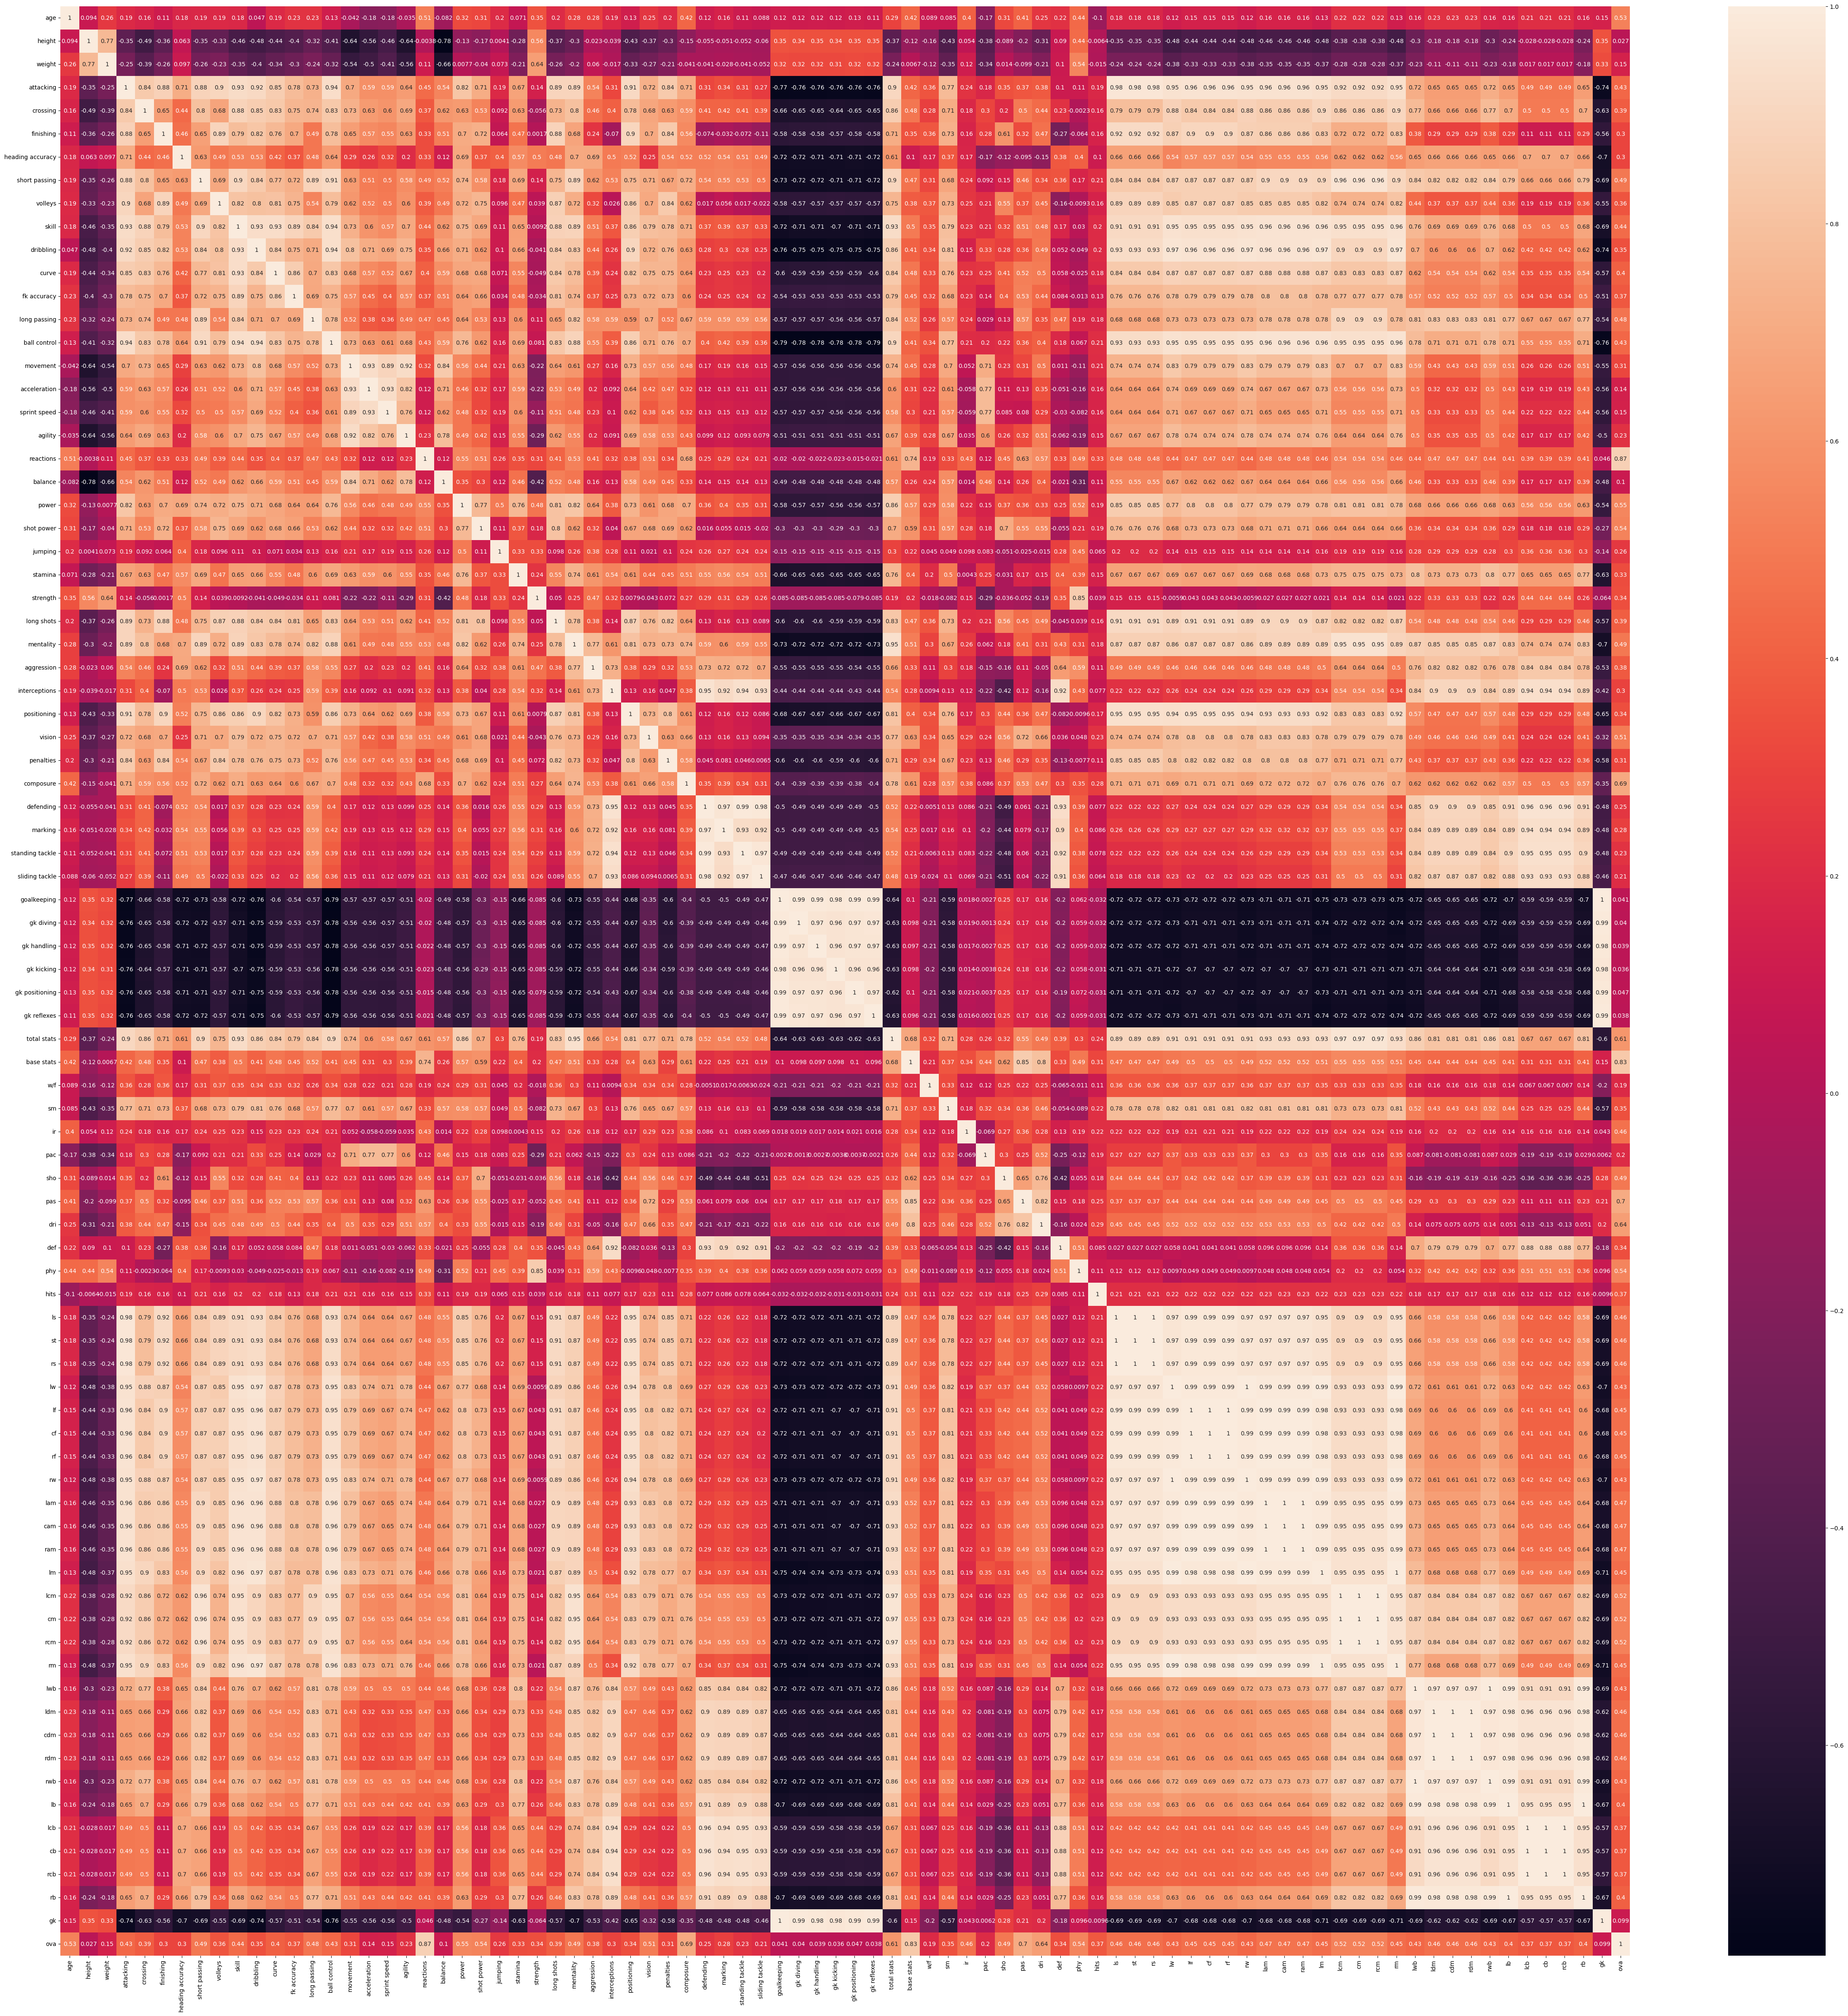

In [39]:
fig, ax= plt.subplots(figsize=(60, 60))
correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## Creating a model

## X-y

In [40]:
# Split X- y
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

X = fifa1.drop('ova', axis=1)
y = fifa1['ova']
X_num = X.select_dtypes(include =np.number)
X_cat = X.select_dtypes(exclude='number')

## Normalizing the numerical data using the MinMaxscaler

In [41]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
x_normalized1 =pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized1

(11618, 83)


age  height    weight  attacking  crossing  finishing  \
0      0.370370    0.40  0.349206   0.546835  0.545455   0.478261   
1      0.518519    0.55  0.333333   0.817722  0.681818   0.826087   
2      0.629630    0.15  0.134921   0.744304  0.761364   0.793478   
3      0.222222    0.45  0.277778   0.506329  0.431818   0.423913   
4      0.259259    0.50  0.261905   0.524051  0.488636   0.369565   
...         ...     ...       ...        ...       ...        ...   
11613  0.481481    0.30  0.293651   0.627848  0.340909   0.750000   
11614  0.333333    0.60  0.404762   0.460759  0.636364   0.228261   
11615  0.407407    0.60  0.452381   0.106329  0.068182   0.119565   
11616  0.222222    0.25  0.206349   0.617722  0.659091   0.684783   
11617  0.222222    0.30  0.206349   0.625316  0.420455   0.663043   

       heading accuracy  short passing   volleys     skill  dribbling  \
0              0.431818       0.710843  0.465116  0.569087   0.615385   
1              0.806818       0.686747  0.837209  0.777518   0.857143   
2              0.329545       0.807229  0.825581  0.892272   0.879121   
3              0.602273       0.614458  0.372093  0.505855   0.538462   
4              0.636364       0.686747  0.348837  0.555035   0.648352   
...                 ...            ...       ...       ...        ...   
11613          0.681818       0.554217  0.651163  0.562061   0.626374   
11614          0.522727       0.578313  0.279070  0.480094   0.571429   
11615          0.090909       0.216867  0.139535  0.124122   0.131868   
11616          0.522727       0.638554  0.430233  0.580796   0.725275   
11617          0.681818       0.638554  0.569767  0.524590   0.648352   

          curve  fk accuracy  long passing  ball control  movement  \
0      0.444444     0.561798      0.642857      0.637363  0.663818   
1      0.822222     0.752809      0.642857      0.813187  0.829060   
2      0.944444     0.966292      0.773810      0.879121  0.886040   
3      0.411111     0.460674      0.571429      0.615385  0.481481   
4      0.444444     0.449438      0.619048      0.670330  0.601140   
...         ...          ...           ...           ...       ...   
11613  0.577778     0.573034      0.440476      0.637363  0.726496   
11614  0.500000     0.269663      0.535714      0.593407  0.626781   
11615  0.122222     0.157303      0.214286      0.142857  0.353276   
11616  0.588889     0.370787      0.583333      0.681319  0.783476   
11617  0.411111     0.426966      0.547619      0.648352  0.792023   

       acceleration  sprint speed   agility  reactions  balance     power  \
0          0.614458      0.729412  0.573171   0.591549   0.8125  0.556270   
1          0.843373      0.847059  0.902439   0.718310   0.7250  0.768489   
2          0.855422      0.764706  0.963415   0.760563   0.9500  0.562701   
3          0.493976      0.564706  0.548780   0.436620   0.4750  0.463023   
4          0.638554      0.647059  0.573171   0.535211   0.6500  0.472669   
...             ...           ...       ...        ...      ...       ...   
11613      0.650602      0.635294  0.756098   0.661972   0.9000  0.546624   
11614      0.783133      0.729412  0.658537   0.408451   0.5500  0.450161   
11615      0.325301      0.341176  0.292683   0.577465   0.4625  0.270096   
11616      0.771084      0.764706  0.878049   0.535211   0.8750  0.466238   
11617      0.819277      0.788235  0.890244   0.521127   0.8375  0.575563   

       shot power   jumping   stamina  strength  long shots  mentality  \
0        0.602410  0.685714  0.694118  0.454545    0.455556   0.654596   
1        0.746988  0.800000  0.741176  0.701299    0.711111   0.718663   
2        0.807229  0.128571  0.741176  0.285714    0.822222   0.771588   
3        0.542169  0.500000  0.611765  0.493506    0.377778   0.562674   
4        0.590361  0.128571  0.811765  0.532468    0.433333   0.665738   
...           ...       ...       ...       ...         ...        ...   
11613    0.626506  0.4

## Encoding categorical data

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model

In [43]:
X_cat = fifa1.select_dtypes(include=object)
X_cat

bp   foot
0       CM  Right
1       ST  Right
2      CAM  Right
3      CDM  Right
4      CDM  Right
...    ...    ...
11695   ST  Right
11696   LB   Left
11697   GK  Right
11698   RM  Right
11700  CAM   Left

[11618 rows x 2 columns]

In [44]:
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

bp_CB  bp_CDM  bp_CF  bp_CM  bp_GK  bp_LB  bp_LM  bp_LW  bp_LWB  bp_RB  \
0    0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0    0.0   
1    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
2    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
3    0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
4    0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   

   bp_RM  bp_RW  bp_RWB  bp_ST  foot_Right  
0    0.0    0.0     0.0    0.0         1.0  
1    0.0    0.0     0.0    1.0         1.0  
2    0.0    0.0     0.0    0.0         1.0  
3    0.0    0.0     0.0    0.0         1.0  
4    0.0    0.0     0.0    0.0         1.0

In [45]:
X_cat_encode.shape

(11618, 15)

## Concatatinating DataFrames

In [46]:
X = pd.concat([X_cat_encode, x_normalized1], axis=1)
X

bp_CB  bp_CDM  bp_CF  bp_CM  bp_GK  bp_LB  bp_LM  bp_LW  bp_LWB  bp_RB  \
0        0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0    0.0   
1        0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
2        0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
3        0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
4        0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
...      ...     ...    ...    ...    ...    ...    ...    ...     ...    ...   
11613    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
11614    0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0     0.0    0.0   
11615    0.0     0.0    0.0    0.0    1.0    0.0    0.0    0.0     0.0    0.0   
11616    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
11617    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   

       bp_RM  bp_RW  bp_RWB  bp_ST  foot_Right       age  height    weight  \
0        0.0    0.0     0.0    0.0         1.0  0.370370    0.40  0.349206   
1        0.0    0.0     0.0    1.0         1.0  0.518519    0.55  0.333333   
2        0.0    0.0     0.0    0.0         1.0  0.629630    0.15  0.134921   
3        0.0    0.0     0.0    0.0         1.0  0.222222    0.45  0.277778   
4        0.0    0.0     0.0    0.0         1.0  0.259259    0.50  0.261905   
...      ...    ...     ...    ...         ...       ...     ...       ...   
11613    0.0    0.0     0.0    1.0         1.0  0.481481    0.30  0.293651   
11614    0.0    0.0     0.0    0.0         0.0  0.333333    0.60  0.404762   
11615    0.0    0.0     0.0    0.0         1.0  0.407407    0.60  0.452381   
11616    1.0    0.0     0.0    0.0         1.0  0.222222    0.25  0.206349   
11617    0.0    0.0     0.0    0.0         0.0  0.222222    0.30  0.206349   

       attacking  crossing  finishing  heading accuracy  short passing  \
0       0.546835  0.545455   0.478261          0.431818       0.710843   
1       0.817722  0.681818   0.826087          0.806818       0.686747   
2       0.744304  0.761364   0.793478          0.329545       0.807229   
3       0.506329  0.431818   0.423913          0.602273       0.614458   
4       0.524051  0.488636   0.369565          0.636364       0.686747   
...          ...       ...        ...               ...            ...   
11613   0.627848  0.340909   0.750000          0.681818       0.554217   
11614   0.460759  0.636364   0.228261          0.522727       0.578313   
11615   0.106329  0.068182   0.119565          0.090909       0.216867   
11616   0.617722  0.659091   0.684783          0.522727       0.638554   
11617   0.625316  0.420455   0.663043          0.681818       0.638554   

        volleys     skill  dribbling     curve  fk accuracy  long passing  \
0      0.465116  0.569087   0.615385  0.444444     0.561798      0.642857   
1      0.837209  0.777518   0.857143  0.822222     0.752809      0.642857   
2      0.825581  0.892272   0.879121  0.944444     0.966292      0.773810   
3      0.372093  0.505855   0.538462  0.411111     0.460674      0.571429   
4      0.348837  0.555035   0.648352  0.444444     0.449438      0.619048   
...         ...       ...        ...       ...          ...           ...   
11613  0.651163  0.562061   0.626374  0.577778     0.573034      0.440476   
11614  0.279070  0.480094   0.571429  0.500000     0.269663      0.535714   
11615  0.139535  0.124122   0.131868  0.122222     0.157303      0.214286   
11616  0.430233  0.580796   0.725275  0.588889     0.370787      0.583333   
11617  0.569767  0.524590   0.648352  0.411111     0.426966      0.547619   

       ball control  movement  acceleration  sprint speed   agility  \
0          0.637363  0.663818      0.614458      0.729412  0.573171   
1          0.813187  0.829060      0.843373      0.847059  0.902439   
2          0.879121  0.886040      0.855422      0.764706  0.963415   

## Spliting the data into test and train samples

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9294, 98)
(2324, 98)
(9294,)
(2324,)


In [49]:
X_train.head()

bp_CB  bp_CDM  bp_CF  bp_CM  bp_GK  bp_LB  bp_LM  bp_LW  bp_LWB  bp_RB  \
198     1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
2388    1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
3424    1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
2208    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    1.0   
2943    1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   

      bp_RM  bp_RW  bp_RWB  bp_ST  foot_Right       age  height    weight  \
198     0.0    0.0     0.0    0.0         1.0  0.111111    0.60  0.380952   
2388    0.0    0.0     0.0    0.0         1.0  0.555556    0.60  0.611111   
3424    0.0    0.0     0.0    0.0         1.0  0.148148    0.60  0.595238   
2208    0.0    0.0     0.0    0.0         1.0  0.407407    0.50  0.404762   
2943    0.0    0.0     0.0    0.0         0.0  0.222222    0.65  0.380952   

      attacking  crossing  finishing  heading accuracy  short passing  \
198    0.491139  0.386364   0.358696          0.625000       0.578313   
2388   0.637975  0.431818   0.456522          0.875000       0.746988   
3424   0.374684  0.318182   0.260870          0.590909       0.361446   
2208   0.592405  0.704545   0.597826          0.465909       0.698795   
2943   0.420253  0.500000   0.315217          0.590909       0.361446   

       volleys     skill  dribbling     curve  fk accuracy  long passing  \
198   0.430233  0.477752   0.472527  0.444444     0.404494      0.559524   
2388  0.534884  0.484778   0.483516  0.311111     0.426966      0.642857   
3424  0.313953  0.311475   0.417582  0.266667     0.258427      0.309524   
2208  0.360465  0.604215   0.670330  0.744444     0.269663      0.690476   
2943  0.279070  0.433255   0.582418  0.333333     0.370787      0.369048   

      ball control  movement  acceleration  sprint speed   agility  reactions  \
198       0.582418  0.487179      0.506024      0.494118  0.451220   0.507042   
2388      0.637363  0.413105      0.433735      0.458824  0.243902   0.704225   
3424      0.406593  0.564103      0.578313      0.658824  0.524390   0.507042   
2208      0.692308  0.774929      0.903614      0.917647  0.707317   0.619718   
2943      0.582418  0.484330      0.506024      0.517647  0.548780   0.492958   

      balance     power  shot power   jumping   stamina  strength  long shots  \
198    0.6000  0.421222    0.409639  0.414286  0.505882  0.623377    0.411111   
2388   0.4250  0.749196    0.626506  0.857143  0.764706  0.857143    0.555556   
3424   0.6125  0.450161    0.168675  0.657143  0.588235  0.909091    0.222222   
2208   0.6375  0.639871    0.662651  0.442857  0.894118  0.675325    0.500000   
2943   0.4750  0.376206    0.277108  0.442857  0.564706  0.584416    0.333333   

      mentality  aggression  interceptions  positioning    vision  penalties  \
198    0.512535    0.517241       0.682353     0.365591  0.435294   0.360465   
2388   0.649025    0.781609       0.882353     0.354839  0.270588   0.639535   
3424   0.501393    0.574713       0.658824     0.376344  0.411765   0.290698   
2208   0.699164    0.816092       0.705882     0.591398  0.670588   0.337209   
2943   0.557103    0.540230       0.658824     0.526882  0.341176   0.465116   

      composure  defending   marking  standing tackle  sliding tackle  \
198    0.369048   0.639676  0.617978         0.666667        0.619048   
2388   0.571429   0.858300  0.853933         0.845238        0.833333   
3424   0.440476   0.676113  0.662921         0.690476        0.654762   
2208   0.583333   0.716599  0.685393         0.714286        0.726190   
2943   0.357143   0.773279  0.764045         0.761905        0.761905   

      goalkeeping  gk diving  gk handling  gk kicking  gk positioning  \
198      0.079625   0.056818     0.058140    0.139535        0.109890   
2388     0.070258   0.068182     0.104651    0.058140        0.065934   
3424     0.079625   0.125000     0.058140    0.058140

In [50]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [51]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9124418795741769

## Model Validation

In [52]:
predictions

array([63.01385498, 74.8361969 , 59.91012573, ..., 68.22235107,
       59.05836487, 63.77989197])

In [53]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.9151355814669359

In [54]:
y_test[:5]

1407    57
233     61
2124    67
5895    63
5165    55
Name: ova, dtype: int64

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse=mean_squared_error(y_test,predictions_test)
mse

4.188659949526319

In [56]:
mse=mean_squared_error(y_test,predictions_test)
print('The mean squared error is ', mse)
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print ('The root-mean-square error is', rmse)
mae = mean_absolute_error(y_test, predictions_test)
print ('The mean absolute error is', mae)

The mean squared error is  4.188659949526319
The root-mean-square error is 2.0466215941219614
The mean absolute error is 1.5960117280996196


In [58]:
y_test.mean()

66.92771084337349

In [59]:
predictions_test.mean()

66.95052476840257

# Import Validating Data

In [61]:
fifa_valid = pd.read_csv('fifa21_validate.csv')
display(fifa_valid.head())
fifa_valid.shape


ID             Name  Age    Nationality                 Club   BP  \
0  219461  E. Palmer-Brown   23  United States      FK Austria Wien   CB   
1  221896       D. Avdijaj   22         Kosovo  Heart of Midlothian  CAM   
2  247428         D. Ochoa   19  United States       Real Salt Lake   GK   
3  255120        N. Kenneh   16        England         Leeds United  CDM   
4  215556     E. Fernandes   24    Switzerland      1. FSV Mainz 05  CDM   

    Position                       Team & Contract Height  Weight   foot  \
0         CB  FK Austria Wien Jun 30, 2021 On Loan   6'2"  194lbs  Right   
1     LM CAM       Heart of Midlothian 2020 ~ 2020   5'8"  154lbs  Right   
2         GK            Real Salt Lake 2018 ~ 2020   6'2"  176lbs  Right   
3  CB CDM RB              Leeds United 2020 ~ 2022   6'3"  170lbs  Right   
4     CM CDM           1. FSV Mainz 05 2019 ~ 2023   6'2"  170lbs  Right   

   Growth        Joined Loan Date End  Value  Wage Release Clause  \
0       7   Feb 8, 2018  Jun 30, 2021  €975K   €5K             €0   
1       5  Jan 20, 2020           NaN  €1.2M   €3K          €2.2M   
2      17  Nov 28, 2018           NaN  €120K  €500          €249K   
3      23  Jan 10, 2020           NaN  €160K  €500          €464K   
4       5   Jul 1, 2019           NaN  €2.3M  €13K          €4.3M   

               Contract  Attacking  Crossing  Finishing  Heading Accuracy  \
0  Jun 30, 2021 On Loan        230        47         21                62   
1           2020 ~ 2020        298        62         60                44   
2           2018 ~ 2020         48         7          5                11   
3           2020 ~ 2022        215        38         31                55   
4           2019 ~ 2023        295        57         59                45   

   Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  Long Passing  \
0             60     40.0    228         44   43.0           36            51   
1             62     70.0    330         76   68.0           56            60   
2             21      4.0     52          6    8.0            8            20   
3             59     32.0    224         51   34.0           38            47   
4             78     56.0    327         71   57.0           51            74   

   Ball Control  Movement  Acceleration  Sprint Speed  Agility  Reactions  \
0            54       303            60            68     63.0         63   
1            70       375            77            72     83.0         64   
2            10       165            28            25     33.0         41   
3            54       275            59            58     56.0         48   
4            74       320            68            66     66.0         64   

   Balance  Power  Shot Power  Jumping  Stamina  Strength  Long Shots  \
0     49.0    288          48     77.0       51        87          25   
1     79.0    323          76     62.0       63        47          75   
2     38.0    171          40     49.0       22        54           6   
3     54.0    242          48     48.0       60        58          28   
4     56.0    337          73     56.0       74        72          62   

   Mentality  Aggression  Interceptions  Positioning  Vision  Penalties  \
0        246          68           62.0         38.0    39.0         39   
1        286          72           26.0         64.0    64.0         60   
2         76          20            9.0          7.0    26.0         14   
3        230          61           55.0         33.0    40.0         41   
4        314          66           78.0         53.0    62.0         55   

   Composure  Defending  Marking  Standing Tackle  Sliding Tackle  \
0       49.0        200       68               67            65.0   
1       65.0         61       19               23            19.0   
2       31.0         27        8                9            10.0   
3       59.0        159       53               52            54.0   
4       63.0        211       

(1999, 101)

In [62]:
fifa_valid = fifa_valid.drop(columns=['Wage', 'Growth', 'Value', 'ID', 'Name', 'Nationality', 'Position', 'Club', 'Team & Contract', "Joined", "Loan Date End", "Release Clause", "Contract", "A/W", "D/W"], axis=1)

In [63]:
cols2 = []
for column in fifa_valid.columns:
    cols2.append(column.lower())
cols2
fifa_valid.columns = cols2

fifa_valid.head()


age   bp height  weight   foot  attacking  crossing  finishing  \
0   23   CB   6'2"  194lbs  Right        230        47         21   
1   22  CAM   5'8"  154lbs  Right        298        62         60   
2   19   GK   6'2"  176lbs  Right         48         7          5   
3   16  CDM   6'3"  170lbs  Right        215        38         31   
4   24  CDM   6'2"  170lbs  Right        295        57         59   

   heading accuracy  short passing  volleys  skill  dribbling  curve  \
0                62             60     40.0    228         44   43.0   
1                44             62     70.0    330         76   68.0   
2                11             21      4.0     52          6    8.0   
3                55             59     32.0    224         51   34.0   
4                45             78     56.0    327         71   57.0   

   fk accuracy  long passing  ball control  movement  acceleration  \
0           36            51            54       303            60   
1           56            60            70       375            77   
2            8            20            10       165            28   
3           38            47            54       275            59   
4           51            74            74       320            68   

   sprint speed  agility  reactions  balance  power  shot power  jumping  \
0            68     63.0         63     49.0    288          48     77.0   
1            72     83.0         64     79.0    323          76     62.0   
2            25     33.0         41     38.0    171          40     49.0   
3            58     56.0         48     54.0    242          48     48.0   
4            66     66.0         64     56.0    337          73     56.0   

   stamina  strength  long shots  mentality  aggression  interceptions  \
0       51        87          25        246          68           62.0   
1       63        47          75        286          72           26.0   
2       22        54           6         76          20            9.0   
3       60        58          28        230          61           55.0   
4       74        72          62        314          66           78.0   

   positioning  vision  penalties  composure  defending  marking  \
0         38.0    39.0         39       49.0        200       68   
1         64.0    64.0         60       65.0         61       19   
2          7.0    26.0         14       31.0         27        8   
3         33.0    40.0         41       59.0        159       53   
4         53.0    62.0         55       63.0        211       72   

   standing tackle  sliding tackle  goalkeeping  gk diving  gk handling  \
0               67            65.0           56         11            8   
1               23            19.0           53         14           13   
2                9            10.0          269         56           52   
3               52            54.0           36          7            5   
4               68            71.0           60         12            7   

   gk kicking  gk positioning  gk reflexes  total stats  base stats  w/f  sm  \
0          15              13            9         1551         334  2 ★  2★   
1           9               9            8         1726         358  4 ★  3★   
2          53              53           55          808         295  2 ★  1★   
3          13               5            6         1381         303  3 ★  2★   
4          13              15           13         1864         407  4 ★  2★   

    ir  pac  sho  pas  dri  def  phy hits    ls    st    rs    lw    lf    cf  \
0  1 ★   64   30   50   50   66   74   34  48+2  48+2  48+2  48+0  47+0  47+0   
1  1 ★   74   67   62   74   24   57   12  64+2  64+2  64+2  68+0  68+0  68+0   
2  1 ★   56   52   53   55   26   53    3  18+2  18+2  18+2  15+0  17+0  17+0   
3  1 ★   58   34   47   52   53   59    6  46+2  46+2  46+2  47+0  46+0  46+0   
4  1 ★   67   62   68   70   69   71   45  63+2  63+2  63+2  66+0  66+0  66+0   

    

In [64]:
fifa_valid['w/f'] = fifa_valid['w/f'].str.rstrip("★").astype(float)
fifa_valid['sm'] = fifa_valid['sm'].str.rstrip("★").astype(float)
fifa_valid['ir'] = fifa_valid['ir'].str.rstrip("★").astype(float)
fifa_valid

age   bp height  weight   foot  attacking  crossing  finishing  \
0      23   CB   6'2"  194lbs  Right        230        47         21   
1      22  CAM   5'8"  154lbs  Right        298        62         60   
2      19   GK   6'2"  176lbs  Right         48         7          5   
3      16  CDM   6'3"  170lbs  Right        215        38         31   
4      24  CDM   6'2"  170lbs  Right        295        57         59   
...   ...  ...    ...     ...    ...        ...       ...        ...   
1994   21   LB   5'8"  143lbs   Left        197        59         23   
1995   21   GK   6'5"  176lbs  Right         77        13          9   
1996   27   RM   5'7"  146lbs   Left        332        76         72   
1997   34  CDM  5'11"  176lbs  Right        268        58         44   
1998   18  CAM  5'10"  150lbs  Right        276        49         54   

      heading accuracy  short passing  volleys  skill  dribbling  curve  \
0                   62             60     40.0    228         44   43.0   
1                   44             62     70.0    330         76   68.0   
2                   11             21      4.0     52          6    8.0   
3                   55             59     32.0    224         51   34.0   
4                   45             78     56.0    327         71   57.0   
...                ...            ...      ...    ...        ...    ...   
1994                42             51     22.0    207         51   30.0   
1995                14             34      7.0     70          9   13.0   
1996                34             79     71.0    373         77   76.0   
1997                61             62     43.0    261         56   47.0   
1998                51             70     52.0    300         60   61.0   

      fk accuracy  long passing  ball control  movement  acceleration  \
0              36            51            54       303            60   
1              56            60            70       375            77   
2               8            20            10       165            28   
3              38            47            54       275            59   
4              51            74            74       320            68   
...           ...           ...           ...       ...           ...   
1994           29            41            56       344            74   
1995           10            25            13       192            31   
1996           65            77            78       351            64   
1997           37            60            61       288            54   
1998           51            66            62       326            68   

      sprint speed  agility  reactions  balance  power  shot power  jumping  \
0               68     63.0         63     49.0    288          48     77.0   
1               72     83.0         64     79.0    323          76     62.0   
2               25     33.0         41     38.0    171          40     49.0   
3               58     56.0         48     54.0    242          48     48.0   
4               66     66.0         64     56.0    337          73     56.0   
...            ...      ...        ...      ...    ...         ...      ...   
1994            78     63.0         50     79.0    245          31     66.0   
1995            30     36.0         59     36.0    177          43     44.0   
1996            65     74.0         73     75.0    329          63     60.0   
1997            52     57.0         61     64.0    300          53     65.0   
1998            61     69.0         55     73.0    256          65     50.0   

      stamina  strength  long shots  mentality  aggression  interceptions  \
0          51        87          25        246          68           62.0   
1          63        47          75        286          72           26.0   
2          22        54           6         76          20            9.0   
3          60        58          28        230          61           55.0   
4          74        72      

In [65]:
fifa_valid['weight'] = fifa_valid['weight'].str.rstrip("lbs").astype(float)/2.2

In [66]:
fifa_valid['height'] = (fifa_valid['height'].str.extract(r'(\d+)\'\s*(\d+)"').astype(float).mul([12*2.54, 2.54]).sum(axis=1))

In [67]:
cols2 = ['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
for col in cols2:
    fifa_valid[col] = fifa_valid[col].apply(lambda x:x.split("+")[0])

In [68]:
fifa_valid[cols2] = fifa_valid[cols2].apply(pd.to_numeric, errors='coerce')

In [69]:
fifa_valid['hits'] = fifa_valid['hits'].apply(pd.to_numeric, errors='coerce')

In [70]:
fifa_valid

age   bp  height     weight   foot  attacking  crossing  finishing  \
0      23   CB  187.96  88.181818  Right        230        47         21   
1      22  CAM  172.72  70.000000  Right        298        62         60   
2      19   GK  187.96  80.000000  Right         48         7          5   
3      16  CDM  190.50  77.272727  Right        215        38         31   
4      24  CDM  187.96  77.272727  Right        295        57         59   
...   ...  ...     ...        ...    ...        ...       ...        ...   
1994   21   LB  172.72  65.000000   Left        197        59         23   
1995   21   GK  195.58  80.000000  Right         77        13          9   
1996   27   RM  170.18  66.363636   Left        332        76         72   
1997   34  CDM  180.34  80.000000  Right        268        58         44   
1998   18  CAM  177.80  68.181818  Right        276        49         54   

      heading accuracy  short passing  volleys  skill  dribbling  curve  \
0                   62             60     40.0    228         44   43.0   
1                   44             62     70.0    330         76   68.0   
2                   11             21      4.0     52          6    8.0   
3                   55             59     32.0    224         51   34.0   
4                   45             78     56.0    327         71   57.0   
...                ...            ...      ...    ...        ...    ...   
1994                42             51     22.0    207         51   30.0   
1995                14             34      7.0     70          9   13.0   
1996                34             79     71.0    373         77   76.0   
1997                61             62     43.0    261         56   47.0   
1998                51             70     52.0    300         60   61.0   

      fk accuracy  long passing  ball control  movement  acceleration  \
0              36            51            54       303            60   
1              56            60            70       375            77   
2               8            20            10       165            28   
3              38            47            54       275            59   
4              51            74            74       320            68   
...           ...           ...           ...       ...           ...   
1994           29            41            56       344            74   
1995           10            25            13       192            31   
1996           65            77            78       351            64   
1997           37            60            61       288            54   
1998           51            66            62       326            68   

      sprint speed  agility  reactions  balance  power  shot power  jumping  \
0               68     63.0         63     49.0    288          48     77.0   
1               72     83.0         64     79.0    323          76     62.0   
2               25     33.0         41     38.0    171          40     49.0   
3               58     56.0         48     54.0    242          48     48.0   
4               66     66.0         64     56.0    337          73     56.0   
...            ...      ...        ...      ...    ...         ...      ...   
1994            78     63.0         50     79.0    245          31     66.0   
1995            30     36.0         59     36.0    177          43     44.0   
1996            65     74.0         73     75.0    329          63     60.0   
1997            52     57.0         61     64.0    300          53     65.0   
1998            61     69.0         55     73.0    256          65     50.0   

      stamina  strength  long shots  mentality  aggression  interceptions  \
0          51        87          25        246          68           62.0   
1          63        47          75        286          72           26.0   
2          22        54           6         76          20            9.0   
3          60        58          28        230          61

In [71]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nulls_df)

         header_name  percent_nulls
0                age           0.00
1                 bp           0.00
2           position           0.00
3             height           0.00
4             weight           0.00
5               foot           0.00
6          attacking           0.00
7           crossing           0.00
8          finishing           0.00
9   heading accuracy           0.00
10     short passing           0.00
11           volleys           0.35
12             skill           0.00
13         dribbling           0.00
14             curve           0.35
15       fk accuracy           0.00
16      long passing           0.00
17      ball control           0.00
18          movement           0.00
19      acceleration           0.00
20      sprint speed           0.00
21           agility           0.35
22         reactions           0.00
23           balance           0.35
24             power           0.00
25        shot power           0.00
26           jumping        

In [72]:
nulls_df = pd.DataFrame(round(fifa_valid.isna().sum()/len(fifa1),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

header_name  percent_nulls
0          age            0.0
1           bp            0.0
2       height            0.0
3       weight            0.0
4         foot            0.0
..         ...            ...
81          cb            0.0
82         rcb            0.0
83          rb            0.0
84          gk            0.0
85         ova            0.0

[86 rows x 2 columns]

In [73]:
fifa_valid['composure'].value_counts(dropna=False)

58.0    75
65.0    74
64.0    71
59.0    68
55.0    67
        ..
23.0     1
90.0     1
17.0     1
12.0     1
92.0     1
Name: composure, Length: 72, dtype: int64

In [74]:
median_composure = fifa_valid['composure'].median()
median_composure

61.0

In [75]:
fifa_valid['composure'] = fifa_valid['composure'].fillna(median_composure)

In [76]:
fifa_valid.isna().sum().sum()

30

In [77]:
fifa_valid= fifa_valid.dropna()

In [78]:
fifa_valid.isna().sum().sum()

0

In [79]:
y1 = fifa_valid['ova'] #defining X-y split
fifa_valid = fifa_valid.drop(['ova'], axis=1)

# Fitting the new data into the model

In [80]:
X_valid_num = fifa_valid.select_dtypes(include = np.number)
X_valid_cat = fifa_valid.select_dtypes(include = object)
X_valid_cat

bp   foot
0      CB  Right
1     CAM  Right
2      GK  Right
3     CDM  Right
4     CDM  Right
...   ...    ...
1994   LB   Left
1995   GK  Right
1996   RM   Left
1997  CDM  Right
1998  CAM  Right

[1987 rows x 2 columns]

In [81]:
#encoder = OneHotEncoder(drop='first').fit(X_valid_cat)

cols = encoder.get_feature_names_out(input_features=X_valid_cat.columns)

X_cat_encode1 = pd.DataFrame(encoder.transform(X_valid_cat).toarray(),columns=cols)

X_cat_encode1.head()

bp_CB  bp_CDM  bp_CF  bp_CM  bp_GK  bp_LB  bp_LM  bp_LW  bp_LWB  bp_RB  \
0    1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
1    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
2    0.0     0.0    0.0    0.0    1.0    0.0    0.0    0.0     0.0    0.0   
3    0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
4    0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   

   bp_RM  bp_RW  bp_RWB  bp_ST  foot_Right  
0    0.0    0.0     0.0    0.0         1.0  
1    0.0    0.0     0.0    0.0         1.0  
2    0.0    0.0     0.0    0.0         1.0  
3    0.0    0.0     0.0    0.0         1.0  
4    0.0    0.0     0.0    0.0         1.0

In [82]:
#transformer = MinMaxScaler().fit(X_valid_num) 
x_normalized2 = transformer.transform(X_valid_num)
print(x_normalized2.shape)
x_normalized3 = pd.DataFrame(x_normalized2, columns=X_valid_num.columns)
x_normalized3

(1987, 83)


age  height    weight  attacking  crossing  finishing  \
0     0.259259    0.65  0.611111   0.475949  0.465909   0.195652   
1     0.222222    0.35  0.293651   0.648101  0.636364   0.619565   
2     0.111111    0.65  0.468254   0.015190  0.011364   0.021739   
3     0.000000    0.70  0.420635   0.437975  0.363636   0.304348   
4     0.296296    0.65  0.420635   0.640506  0.579545   0.608696   
...        ...     ...       ...        ...       ...        ...   
1982  0.185185    0.35  0.206349   0.392405  0.602273   0.217391   
1983  0.185185    0.80  0.468254   0.088608  0.079545   0.065217   
1984  0.407407    0.30  0.230159   0.734177  0.795455   0.750000   
1985  0.666667    0.50  0.468254   0.572152  0.590909   0.445652   
1986  0.074074    0.45  0.261905   0.592405  0.488636   0.554348   

      heading accuracy  short passing   volleys     skill  dribbling  \
0             0.647727       0.590361  0.418605  0.433255   0.428571   
1             0.443182       0.614458  0.767442  0.672131   0.780220   
2             0.068182       0.120482  0.000000  0.021077   0.010989   
3             0.568182       0.578313  0.325581  0.423888   0.505495   
4             0.454545       0.807229  0.604651  0.665105   0.725275   
...                ...            ...       ...       ...        ...   
1982          0.420455       0.481928  0.209302  0.384075   0.505495   
1983          0.102273       0.277108  0.034884  0.063232   0.043956   
1984          0.329545       0.819277  0.779070  0.772834   0.791209   
1985          0.636364       0.614458  0.453488  0.510539   0.560440   
1986          0.522727       0.710843  0.558140  0.601874   0.604396   

         curve  fk accuracy  long passing  ball control  movement  \
0     0.433333     0.348315      0.500000      0.538462  0.541311   
1     0.711111     0.573034      0.607143      0.714286  0.746439   
2     0.044444     0.033708      0.130952      0.054945  0.148148   
3     0.333333     0.370787      0.452381      0.538462  0.461538   
4     0.588889     0.516854      0.773810      0.758242  0.589744   
...        ...          ...           ...           ...       ...   
1982  0.288889     0.269663      0.380952      0.560440  0.658120   
1983  0.100000     0.056180      0.190476      0.087912  0.225071   
1984  0.800000     0.674157      0.809524      0.802198  0.678063   
1985  0.477778     0.359551      0.607143      0.615385  0.498575   
1986  0.633333     0.516854      0.678571      0.626374  0.606838   

      acceleration  sprint speed   agility  reactions  balance     power  \
0         0.566265      0.670588  0.597561   0.549296   0.4000  0.498392   
1         0.771084      0.717647  0.841463   0.563380   0.7750  0.610932   
2         0.180723      0.164706  0.231707   0.239437   0.2625  0.122186   
3         0.554217      0.552941  0.512195   0.338028   0.4625  0.350482   
4         0.662651      0.647059  0.634146   0.563380   0.4875  0.655949   
...            ...           ...       ...        ...      ...       ...   
1982      0.734940      0.788235  0.597561   0.366197   0.7750  0.360129   
1983      0.216867      0.223529  0.268293   0.492958   0.2375  0.141479   
1984      0.614458      0.635294  0.731707   0.690141   0.7250  0.630225   
1985      0.493976      0.482353  0.524390   0.521127   0.5875  0.536977   
1986      0.662651      0.588235  0.670732   0.436620   0.7000  0.395498   

      shot power   jumping   stamina  strength  long shots  mentality  \
0       0.433735  0.742857  0.458824  0.870130    0.233333   0.532033   
1       0.771084  0.528571  0.600000  0.350649    0.788889   0.643454   
2       0.337349  0.342857  0.117647  0.441558    0.022222   0.058496   
3       0.433735  0.328571  0.564706  0.493506    0.266667   0.487465   
4       0.734940  0.442857  0.729412  0.675325    0.644444   0.721448   
...          ...       ...       ...       ...         ...        ...   
1982    0.228916  0.585714  0.658824  0.389610    0.288889   0.493036   
198

In [83]:
X_valid = pd.concat([X_cat_encode1, x_normalized3], axis=1)
X_valid


bp_CB  bp_CDM  bp_CF  bp_CM  bp_GK  bp_LB  bp_LM  bp_LW  bp_LWB  bp_RB  \
0       1.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
1       0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
2       0.0     0.0    0.0    0.0    1.0    0.0    0.0    0.0     0.0    0.0   
3       0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
4       0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
...     ...     ...    ...    ...    ...    ...    ...    ...     ...    ...   
1982    0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0     0.0    0.0   
1983    0.0     0.0    0.0    0.0    1.0    0.0    0.0    0.0     0.0    0.0   
1984    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
1985    0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
1986    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   

      bp_RM  bp_RW  bp_RWB  bp_ST  foot_Right       age  height    weight  \
0       0.0    0.0     0.0    0.0         1.0  0.259259    0.65  0.611111   
1       0.0    0.0     0.0    0.0         1.0  0.222222    0.35  0.293651   
2       0.0    0.0     0.0    0.0         1.0  0.111111    0.65  0.468254   
3       0.0    0.0     0.0    0.0         1.0  0.000000    0.70  0.420635   
4       0.0    0.0     0.0    0.0         1.0  0.296296    0.65  0.420635   
...     ...    ...     ...    ...         ...       ...     ...       ...   
1982    0.0    0.0     0.0    0.0         0.0  0.185185    0.35  0.206349   
1983    0.0    0.0     0.0    0.0         1.0  0.185185    0.80  0.468254   
1984    1.0    0.0     0.0    0.0         0.0  0.407407    0.30  0.230159   
1985    0.0    0.0     0.0    0.0         1.0  0.666667    0.50  0.468254   
1986    0.0    0.0     0.0    0.0         1.0  0.074074    0.45  0.261905   

      attacking  crossing  finishing  heading accuracy  short passing  \
0      0.475949  0.465909   0.195652          0.647727       0.590361   
1      0.648101  0.636364   0.619565          0.443182       0.614458   
2      0.015190  0.011364   0.021739          0.068182       0.120482   
3      0.437975  0.363636   0.304348          0.568182       0.578313   
4      0.640506  0.579545   0.608696          0.454545       0.807229   
...         ...       ...        ...               ...            ...   
1982   0.392405  0.602273   0.217391          0.420455       0.481928   
1983   0.088608  0.079545   0.065217          0.102273       0.277108   
1984   0.734177  0.795455   0.750000          0.329545       0.819277   
1985   0.572152  0.590909   0.445652          0.636364       0.614458   
1986   0.592405  0.488636   0.554348          0.522727       0.710843   

       volleys     skill  dribbling     curve  fk accuracy  long passing  \
0     0.418605  0.433255   0.428571  0.433333     0.348315      0.500000   
1     0.767442  0.672131   0.780220  0.711111     0.573034      0.607143   
2     0.000000  0.021077   0.010989  0.044444     0.033708      0.130952   
3     0.325581  0.423888   0.505495  0.333333     0.370787      0.452381   
4     0.604651  0.665105   0.725275  0.588889     0.516854      0.773810   
...        ...       ...        ...       ...          ...           ...   
1982  0.209302  0.384075   0.505495  0.288889     0.269663      0.380952   
1983  0.034884  0.063232   0.043956  0.100000     0.056180      0.190476   
1984  0.779070  0.772834   0.791209  0.800000     0.674157      0.809524   
1985  0.453488  0.510539   0.560440  0.477778     0.359551      0.607143   
1986  0.558140  0.601874   0.604396  0.633333     0.516854      0.678571   

      ball control  movement  acceleration  sprint speed   agility  reactions  \
0         0.538462  0.541311      0.566265      0.670588  0.597561   0.549296   
1         0.714286  0.746439      0.771084      0.717647  0.841463   0.563380   
2         0.054945  0.148148      0.180723      0.164706  0.231707   0.239437   
3     

In [84]:
results_X_valid = lm.predict(X_valid)
display(results_X_valid)


array([65.05635071, 65.48895264, 53.42012024, ..., 74.16604614,
       63.94517517, 61.13931274])

In [85]:
mse=mean_squared_error(y1,results_X_valid)
print('The mean squared error is ', mse)
rmse = np.sqrt(mean_squared_error(y1,results_X_valid))
print ('The root-mean-square error is', rmse)
mae = mean_absolute_error(y1,results_X_valid)
print ('The mean absolute error is', mae)

The mean squared error is  4.1165971200386835
The root-mean-square error is 2.0289399005487283
The mean absolute error is 1.5781024535457033


In [86]:
r2_score(y1, results_X_valid)

0.9090132564885924